In [1]:
import pickle
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.cluster import KMeans
from DHTVPac.HTV_Delaunay import MyDelaunay
from DHTVPac.opt_solver import *
import scipy
from DHTVPac.MyPloter import *
from matplotlib import  pyplot as plt
import math

In [3]:
np.random.seed(2022)

N = 8000
T = 0.4
epsilon = 0.4
xy = np.random.uniform(0, 1, size=(N, 2))

def profile(xy):
    return(np.sin(xy[:, 0]/T*2*np.pi) + 5 * xy[:, 1])

z = profile(xy) + epsilon * np.random.normal(0, 1, size=(N,))

X_train = xy
y_train = z


tri = MyDelaunay(X_train, y_train)
   
tri.construct_forward_matrix()
tri.construct_regularization_matrix()
    

y_fista, _ = double_fista(tri.data_values, tri.H, tri.L, tri.lip_H, tri.lip_L, 1, 1, 1000000, device='cuda:0', verbose=False)
train_htv = tri.evaluate(X_train, y_fista.detach().cpu().numpy())

plot_with_gradient_map(tri, 0.5, 1, 1, 1)
tri.update_values(y_fista.detach().cpu().numpy())
plot_with_gradient_map(tri, 0.5, 1, 1, 1)

/home/mehrsa/Desktop/DHTV/DHTVPac/opt_solver.py:63: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:54.)
  H = torch.sparse_csr_tensor(H.indptr.tolist(), H.indices.tolist(), H.data.tolist(), dtype=torch.double, size = H.shape, device=device)


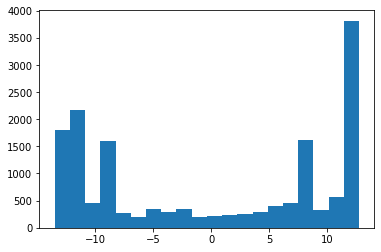

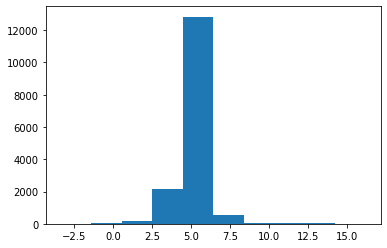

In [ ]:
plt.hist(tri.lat_coeffs[:, 0], bins=20)
plt.show()


plt.hist(tri.lat_coeffs[:, 1])
plt.show()